# Lead Score Case Study

In [383]:
# Supressing the Warnings:
import warnings
warnings.filterwarnings('ignore')

#Importing important packages:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [384]:
# Reading Data:
ls0 = pd.read_csv('Leads.csv')
ls0.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [385]:
# Checking shape of data:
ls0.shape

(9240, 37)

In [386]:
ls=ls0

In [387]:
# Checking data type and null values:
ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [388]:
# Checking distribution of data:
ls.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [389]:
# Checking duplicates in data:
ls.duplicated(subset = 'Prospect ID').sum() == 0

True

### Data Cleaning:

In [390]:
# Replacing 'Select' with nan values:
ls = ls.replace('Select', np.nan)

In [391]:
# Dropping ID columns as these are unique values:
ls.drop(['Lead Number'], axis=1, inplace = True)

In [392]:
ls.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [393]:
# Checking shape of data:
ls.shape

(9240, 36)

In [394]:
# Checking null values in data:
ls.isnull().sum()

Prospect ID                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [395]:
# Getting percentage of null values in data:
round((ls.isnull().sum()/len(ls['Lead Origin']))*100, 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [396]:
# Dropping columns with nan values more than 45%:
for i in ls.columns:
    if(ls[i].isnull().sum()/len(ls['Lead Origin']))*100 >= 45:
        ls.drop(i,axis=1, inplace=True)


In [397]:
# Checking percentage of null values in data:
round((ls.isnull().sum()/len(ls['Lead Origin']))*100, 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [398]:
# Imputing na values with 'not provided':
ls['Specialization'].fillna('not provided', inplace=True) 
ls['What is your current occupation'].fillna('not provided', inplace=True)
ls['Country'].fillna('not provided')
ls['What matters most to you in choosing a course'].fillna('not provided',inplace=True)
ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [399]:
# Getting columns with unique values:
ls.nunique()

Prospect ID                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
What is your current occupation                     7
What matters most to you in choosing a course       4
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [400]:
# Dropping all the columns with unique values:
ls= ls.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [401]:
# Checking missing values percentage:
round((ls.isnull().sum()/len(ls['Lead Origin']))*100, 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

#### Performing Data Cleaning columnwise:

In [402]:
ls.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [403]:
# Dropping all sales generated columns:
ls.drop(labels=['Last Activity','Tags'],axis=1, inplace=True)

### Lead Source:

In [404]:
# Checking misssing values in Lead score column:
ls['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
WeLearn                 1
NC_EDM                  1
testone                 1
welearnblog_Home        1
blog                    1
youtubechannel          1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [405]:
# Imputing missing values with Mode:
ls['Lead Source'].fillna(ls['Lead Source'].mode()[0], inplace=True)

In [406]:
# Checking Value ccounts after imputing:
ls['Lead Source'].value_counts(dropna=False)

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
NC_EDM                  1
testone                 1
youtubechannel          1
welearnblog_Home        1
blog                    1
Pay per Click Ads       1
WeLearn                 1
Name: Lead Source, dtype: int64

In [407]:
# Combaining Skew entities into one:
ls['Lead Source'].replace(['Facebook','bing','google','Click2call','Social Media','Press_Release','Live Chat',
                                             'youtubechannel','testone','Pay per Click Ads','NC_EDM','WeLearn','welearnblog_Home','blog'],'Other Source', inplace=True)

In [408]:
# Checking value counts after removing skewness:
ls['Lead Source'].value_counts(dropna=False)

Google              2904
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Other Source          83
Name: Lead Source, dtype: int64

### TotalVisits:

In [409]:
# Checking head of 'TotalVisits':
ls['TotalVisits'].head()

0    0.0
1    5.0
2    2.0
3    1.0
4    2.0
Name: TotalVisits, dtype: float64

In [410]:
# Checking Null values in 'TotalVisits':
ls['TotalVisits'].value_counts(dropna=False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
27.0        5
25.0        5
24.0        5
22.0        3
26.0        2
29.0        2
28.0        2
115.0       1
54.0        1
43.0        1
30.0        1
32.0        1
74.0        1
251.0       1
41.0        1
141.0       1
42.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [411]:
# Filling Null values with Mode:
ls['TotalVisits'].fillna(ls['TotalVisits'].mode()[0], inplace=True)

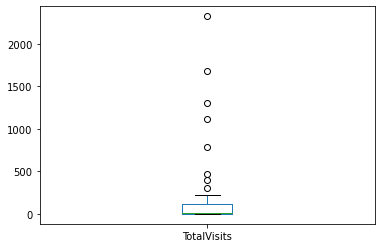

In [412]:
# Visualising the distribution of 'TotalVisits':
ls['TotalVisits'].value_counts().plot.box()
plt.show()

In [413]:
# Checking distribution of values in the column:
ls['TotalVisits'].describe()

count    9240.000000
mean        3.394156
std         4.836682
min         0.000000
25%         0.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [414]:
# Capping 1% values from top and bottom:
Quanta1 = ls['TotalVisits'].quantile(0.01)
Quanta3 = ls['TotalVisits'].quantile(0.99)

ls = ls[ls['TotalVisits']>=Quanta1]
ls = ls[ls['TotalVisits']<=Quanta3]

ls['TotalVisits'].describe()

count    9157.000000
mean        3.159004
std         2.993084
min         0.000000
25%         0.000000
50%         3.000000
75%         5.000000
max        17.000000
Name: TotalVisits, dtype: float64

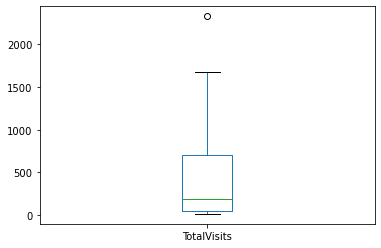

In [415]:
# Plotting box plot of 'TotalVisits':
ls['TotalVisits'].value_counts().plot.box()
plt.show()

- From above plot one can infer that, almost 75% of the data points are having TotalVisits of below 750.

### Page Views Per Visit:

In [416]:
# Checking head of 'Page Views Per Visit':
ls['Page Views Per Visit'].head()

0    0.0
1    2.5
2    2.0
3    1.0
4    1.0
Name: Page Views Per Visit, dtype: float64

In [417]:
# Filling missing values with mode:
ls['Page Views Per Visit'].fillna(ls['Page Views Per Visit'].mode()[0], inplace=True)

In [418]:
# Checking value counts after imputing:
ls['Page Views Per Visit'].value_counts(dropna=False)

0.00    2326
2.00    1792
3.00    1193
4.00     893
1.00     651
        ... 
2.13       1
1.31       1
1.86       1
1.45       1
1.14       1
Name: Page Views Per Visit, Length: 73, dtype: int64

In [419]:
# Checking distribution of values:
ls['Page Views Per Visit'].describe()

count    9157.000000
mean        2.302302
std         2.066450
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

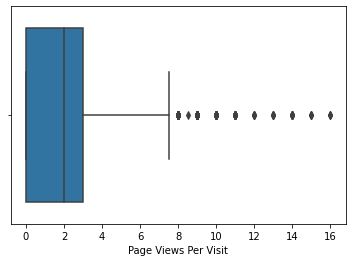

In [420]:
# Visualising boxplot of values:
sns.boxplot(ls['Page Views Per Visit'])
plt.show()

In [421]:
# Capping 1% values from top and bottom:
Quanta1 = ls['Page Views Per Visit'].quantile(0.01)
Quanta3 = ls['Page Views Per Visit'].quantile(0.99)

ls = ls[ls['Page Views Per Visit']>=Quanta1]
ls = ls[ls['Page Views Per Visit']<=Quanta3]

ls['Page Views Per Visit'].describe()

count    9090.000000
mean        2.232693
std         1.901055
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max         9.000000
Name: Page Views Per Visit, dtype: float64

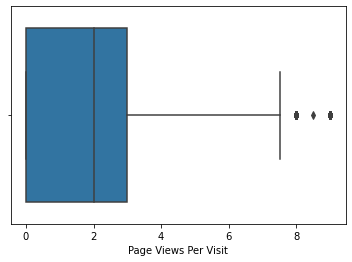

In [422]:
# Visualising 'Page Views Per Visit' after removing outliers:
sns.boxplot(ls['Page Views Per Visit'])
plt.show()

- From above graph we can infer that, almost 75% of datapoints are having page views per visits of between 0-3

### Country:

In [423]:
# Checking head of Country column:
ls['Country'].head()

0      NaN
1    India
2    India
3    India
4    India
Name: Country, dtype: object

In [424]:
# Checking value counts in country column:
ls['Country'].value_counts(dropna=False)

India                   6347
NaN                     2460
United States             68
United Arab Emirates      52
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
South Africa               4
Canada                     4
unknown                    4
Germany                    4
Kuwait                     4
Nigeria                    4
Sweden                     3
Belgium                    2
Asia/Pacific Region        2
Philippines                2
Bangladesh                 2
Italy                      2
Uganda                     2
Ghana                      2
China                      2
Vietnam                    1
Kenya                      1
Malaysia                   1
Sri Lanka                  1
Denmark                    1
Tanzania                   1
Russia        

In [425]:
# Replacing all non Indian countries to Outside india:
def countr(c):
    cat = ''
    if c == 'India':
        cat = 'India'
    elif c == 'not provided':
        cat = 'not provided'
    else:
        cat = 'outside india'
    return cat

ls['Country'] = ls.apply(lambda c:countr(c['Country']), axis = 1)
ls['Country'].value_counts()

India            6347
outside india    2743
Name: Country, dtype: int64

- We have replaced all the countries other than India to Outside India.

### Specialization:

In [426]:
# Checking Head of specilisation column:
ls.Specialization.head()

0               not provided
1               not provided
2    Business Administration
3      Media and Advertising
4               not provided
Name: Specialization, dtype: object

In [427]:
# Checking null values in specilisation column:
ls.Specialization.value_counts(dropna=False)

not provided                         3360
Finance Management                    959
Human Resource Management             830
Marketing Management                  829
Operations Management                 498
Business Administration               394
IT Projects Management                360
Supply Chain Management               341
Banking, Investment And Insurance     328
Media and Advertising                 198
Travel and Tourism                    190
International Business                173
Healthcare Management                 153
Hospitality Management                110
E-COMMERCE                            108
Retail Management                      95
Rural and Agribusiness                 70
E-Business                             56
Services Excellence                    38
Name: Specialization, dtype: int64

In [428]:
# Checking percentage of null values in entire dataset:
round((ls.isnull().sum()/len(ls['Lead Origin']))*100, 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

### City:

In [429]:
# Checking Head of City column:
ls.City.head()

0       NaN
1       NaN
2    Mumbai
3    Mumbai
4    Mumbai
Name: City, dtype: object

In [430]:
# Checking null values in City column:
ls.City.value_counts(dropna=False)

NaN                            3647
Mumbai                         3152
Thane & Outskirts               729
Other Cities                    675
Other Cities of Maharashtra     448
Other Metro Cities              367
Tier II Cities                   72
Name: City, dtype: int64

In [431]:
# Replacing NaN values with not specified in City Column:
ls['City'].replace(np.nan,'Not Specified', inplace=True)

In [432]:
# Checking NaN value percentage in dataset:
round((ls.isnull().sum()/len(ls['Lead Origin']))*100, 2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

- Dropping columns with imbalance values:

In [433]:
# List of columns with imbalance values:
cols = ls[['Search','Newspaper Article','X Education Forums','Newspaper',
                     'Digital Advertisement','Through Recommendations','Do Not Call']]

#dropping columns with imbalance values:
ls.drop(cols, axis=1, inplace = True)
ls.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9090 non-null   object 
 1   Lead Origin                                    9090 non-null   object 
 2   Lead Source                                    9090 non-null   object 
 3   Do Not Email                                   9090 non-null   object 
 4   Converted                                      9090 non-null   int64  
 5   TotalVisits                                    9090 non-null   float64
 6   Total Time Spent on Website                    9090 non-null   int64  
 7   Page Views Per Visit                           9090 non-null   float64
 8   Country                                        9090 non-null   object 
 9   Specialization                                 9090 

In [434]:
ls2=ls

In [435]:
# Checking number of rows remain after cleaning data:
round(100*(ls2.shape[0])/(ls0.shape[0]),2)

98.38

- As the Data is Clean now we can move foe EDA:

### Exploratory Data Analysis

### Univarriate Analysis;

In [436]:
# Getting list of Columns:
ls2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9090 non-null   object 
 1   Lead Origin                                    9090 non-null   object 
 2   Lead Source                                    9090 non-null   object 
 3   Do Not Email                                   9090 non-null   object 
 4   Converted                                      9090 non-null   int64  
 5   TotalVisits                                    9090 non-null   float64
 6   Total Time Spent on Website                    9090 non-null   int64  
 7   Page Views Per Visit                           9090 non-null   float64
 8   Country                                        9090 non-null   object 
 9   Specialization                                 9090 

#### Categorical Variables:

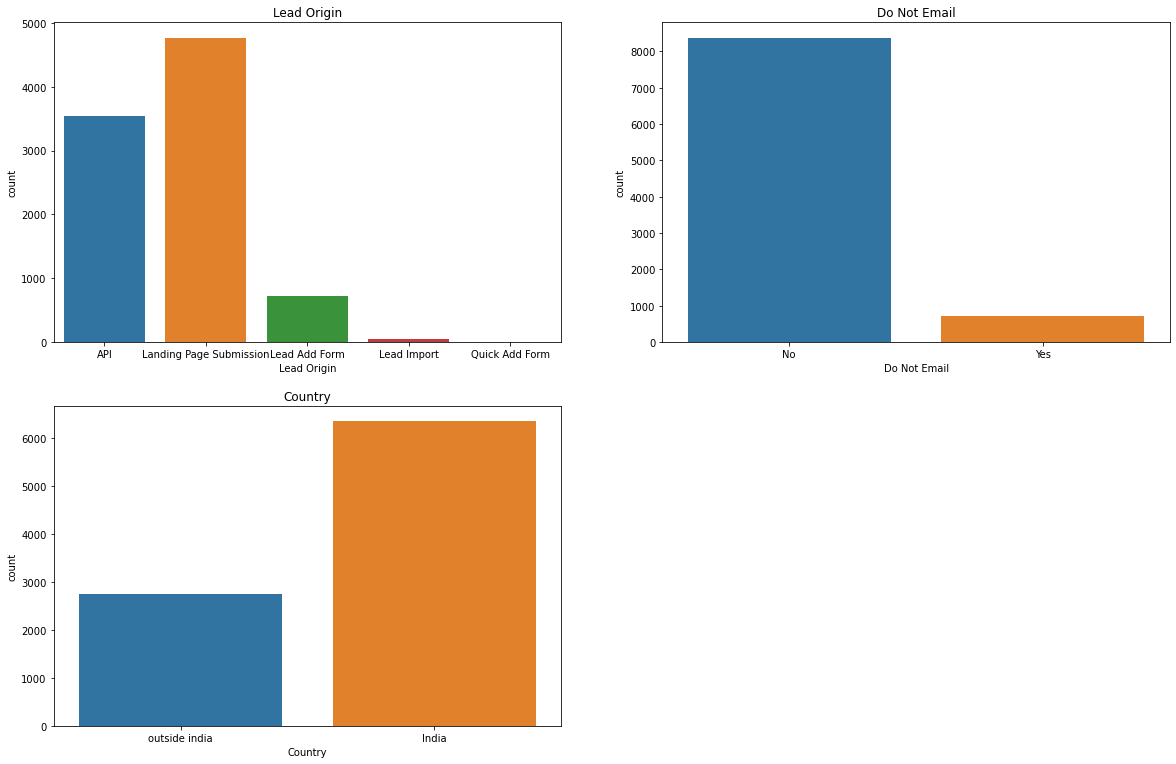

In [437]:
# Plotting Subplots of categorical variables:
plt.figure(figsize = (20,20))

plt.subplot(3,2,1)
sns.countplot(ls2['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(3,2,2)
sns.countplot(ls2['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(3,2,3)
sns.countplot(ls2['Country'])
plt.title('Country')

plt.show()

One can say from the above plot that, 
1. Most of the leads were originated from APIs and Landing page submission, whereas the least were from Quick Add form.
2. Among all the customers most of them replied as No to Do not Email.
3. A large number of leads came from India itself, then from the other country.

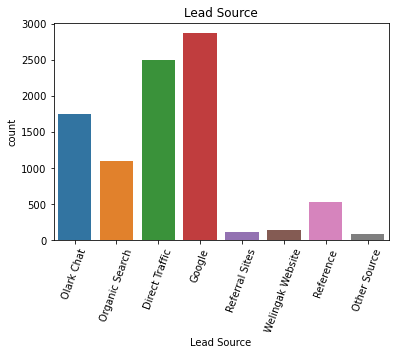

In [438]:
# Visualising Lead source:
sns.countplot(ls2['Lead Source']).tick_params(rotation = 70, axis='x')
plt.title('Lead Source')
plt.show() 

- From above graph we can see that, leads were generated majorly from Google and Direct Traffic and least were from Referral Sites.

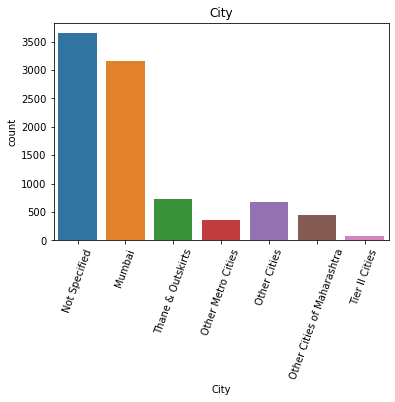

In [439]:
# Plotting City: 
sns.countplot(ls2['City']).tick_params(rotation = 70, axis='x')
plt.title('City')
plt.show()

- From above graph one can infer that, customers from mumbai are more, compared to other cities. 

### Bivariate Analysis:

##### Categorica - categorical:

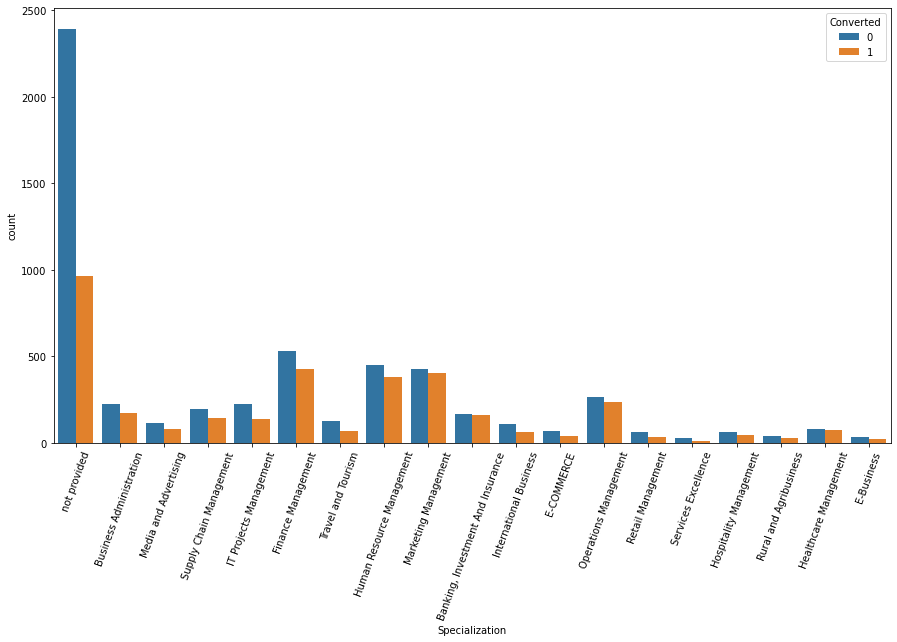

In [440]:
# plotting conversion across specilisation:
plt.figure(figsize=(15,8))
l1=sns.countplot(ls2.Specialization, hue=ls2.Converted)
l1.set_xticklabels(l1.get_xticklabels(),rotation = 70)
plt.show()

- The leads whose specialization were not provided, shown higher conversion rate, compared with other specialization.
- Whereas the Leads with E-Business and Service-Excellence as specialization showed lower conversion. 

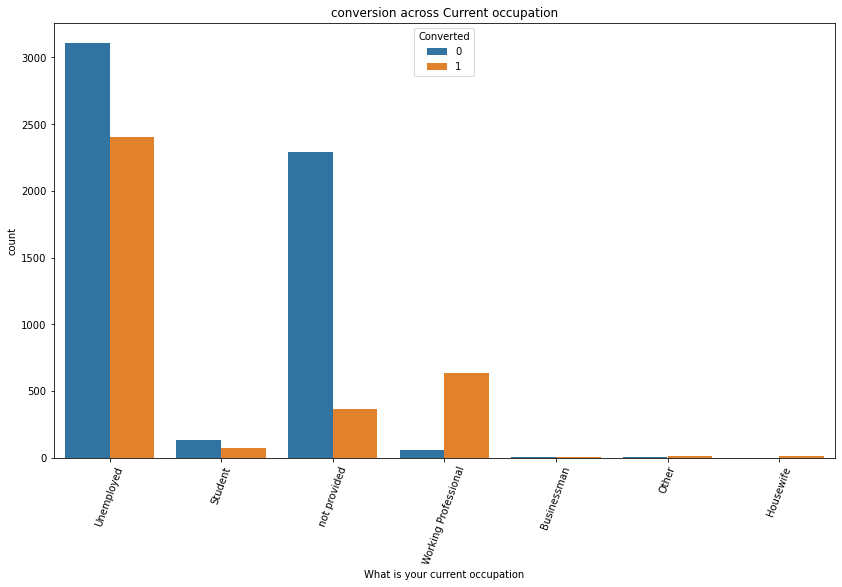

In [441]:
# Plotting conversion across Current occupation:
plt.figure(figsize=(14,8))
plt.title(label='conversion across Current occupation')
l1=sns.countplot(ls2['What is your current occupation'], hue=ls2.Converted)
l1.set_xticklabels(l1.get_xticklabels(),rotation=70)
plt.show()



- From the above plot one can say that, people who are unemployed have the highest conversion rate compared to other occupation. 

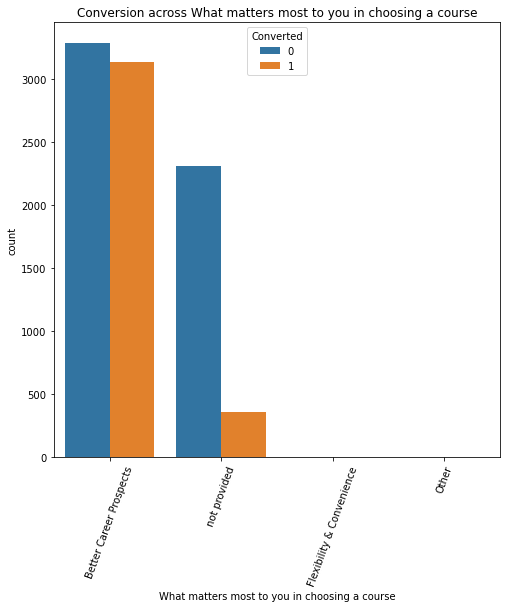

In [442]:
# plotting Conversion across What matters most to you in choosing a course:
plt.figure(figsize=(8,8))
sns.countplot(hue='Converted', x='What matters most to you in choosing a course', data= ls2).tick_params(rotation = 70, axis='x')
plt.title('Conversion across What matters most to you in choosing a course')
plt.show()

- From above plot we can infer that, people with motive of seeking higher career prospects showed higher conversion rate, compared to any other.

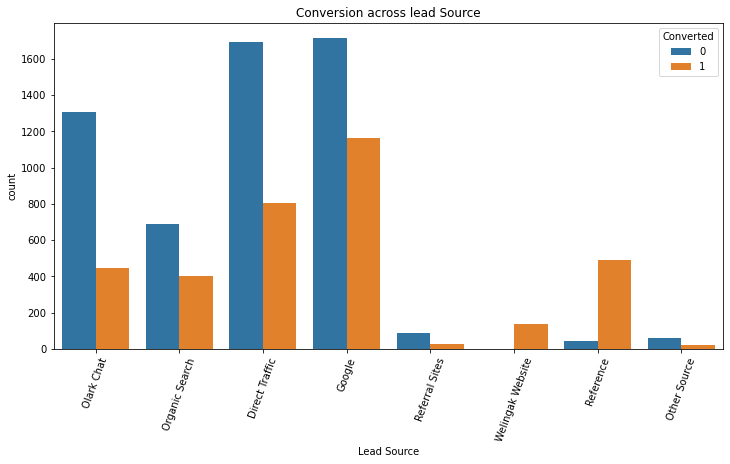

In [443]:
# plotting Conversion across lead Source:
plt.figure(figsize=(12,6))
plt.title('Conversion across lead Source')
c1=sns.countplot(ls2['Lead Source'], hue=ls2.Converted)
c1.set_xticklabels(c1.get_xticklabels(),rotation=70)
plt.show()



- From above figure one can say that, leads sourced from google and direct traffic showed higher conversion rate, However these source also shown higher non conversion rate.
- the source with reference showed higher conversion rate.

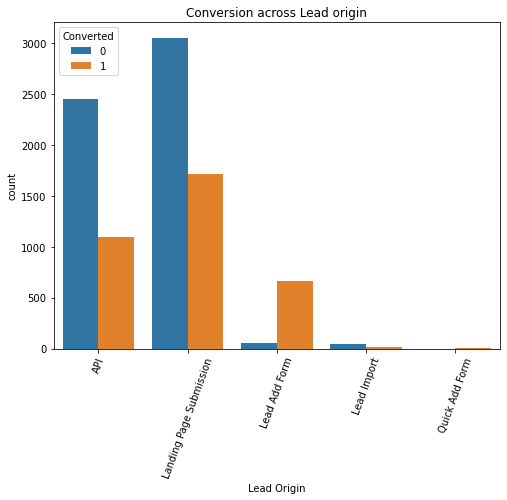

In [444]:
# Plotting Conversion across Lead origin:
plt.figure(figsize=(8,6))
plt.title('Conversion across Lead origin')
c1=sns.countplot(ls2['Lead Origin'], hue=ls2.Converted)
c1.set_xticklabels(c1.get_xticklabels(),rotation=70)
plt.show()



- From the above plot we can see that, the leads which were originated from landing page submission showed higher conversion rate, however the same category also had the highest non conversion rate too.

In [445]:
# Checking list of Variables considered:
ls2.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

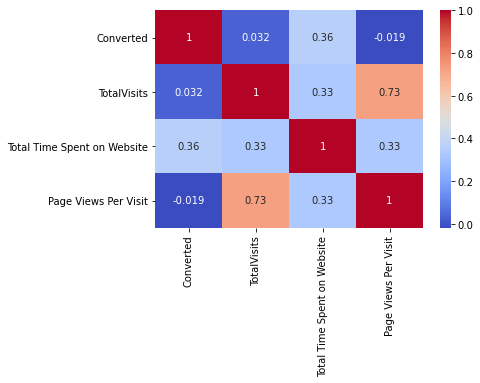

In [446]:
# Plotting heatmap of numerical variables:
sns.heatmap(ls2.corr(), cmap="coolwarm", annot=True)
plt.show()

- Page views per visit and Total Visits have highest correlation, and it is also obvious.
- whereas, Converted and Page views per visit have the lowest.

### Model building:

In [447]:
# Formation of dummy variables:
new = pd.get_dummies(ls2[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe:
ls2 = pd.concat([ls2, new], axis=1)
ls2.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,0,0.0,0,0.0,outside india,not provided,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,0,5.0,674,2.5,India,not provided,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,India,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,India,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,1,2.0,1428,1.0,India,not provided,...,0,0,1,0,0,0,0,0,0,0


In [448]:
# Dropping orriginal variable after creation of dummy:
ls2= ls2.drop(['Lead Origin','What is your current occupation_not provided','Do Not Email', 'Lead Source',
               'Country', 'Specialization', 'Specialization_not provided','What is your current occupation',
               'What matters most to you in choosing a course'
               ,'Last Notable Activity','A free copy of Mastering The Interview'], 1)
ls2.head()

,Prospect ID,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,City,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0.0,0,0.0,Not Specified,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,5.0,674,2.5,Not Specified,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,2.0,1532,2.0,Mumbai,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,1.0,305,1.0,Mumbai,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,1,2.0,1428,1.0,Mumbai,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [449]:
# Checking variables in ls2 columns after creating dummy:
ls2.columns

Index(['Prospect ID', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'City',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_

In [450]:
# Dropping City column:
ls2=ls2.drop(['City'],axis=1)

In [451]:
# Checking shape of Ls2:
ls2.shape

(9090, 55)

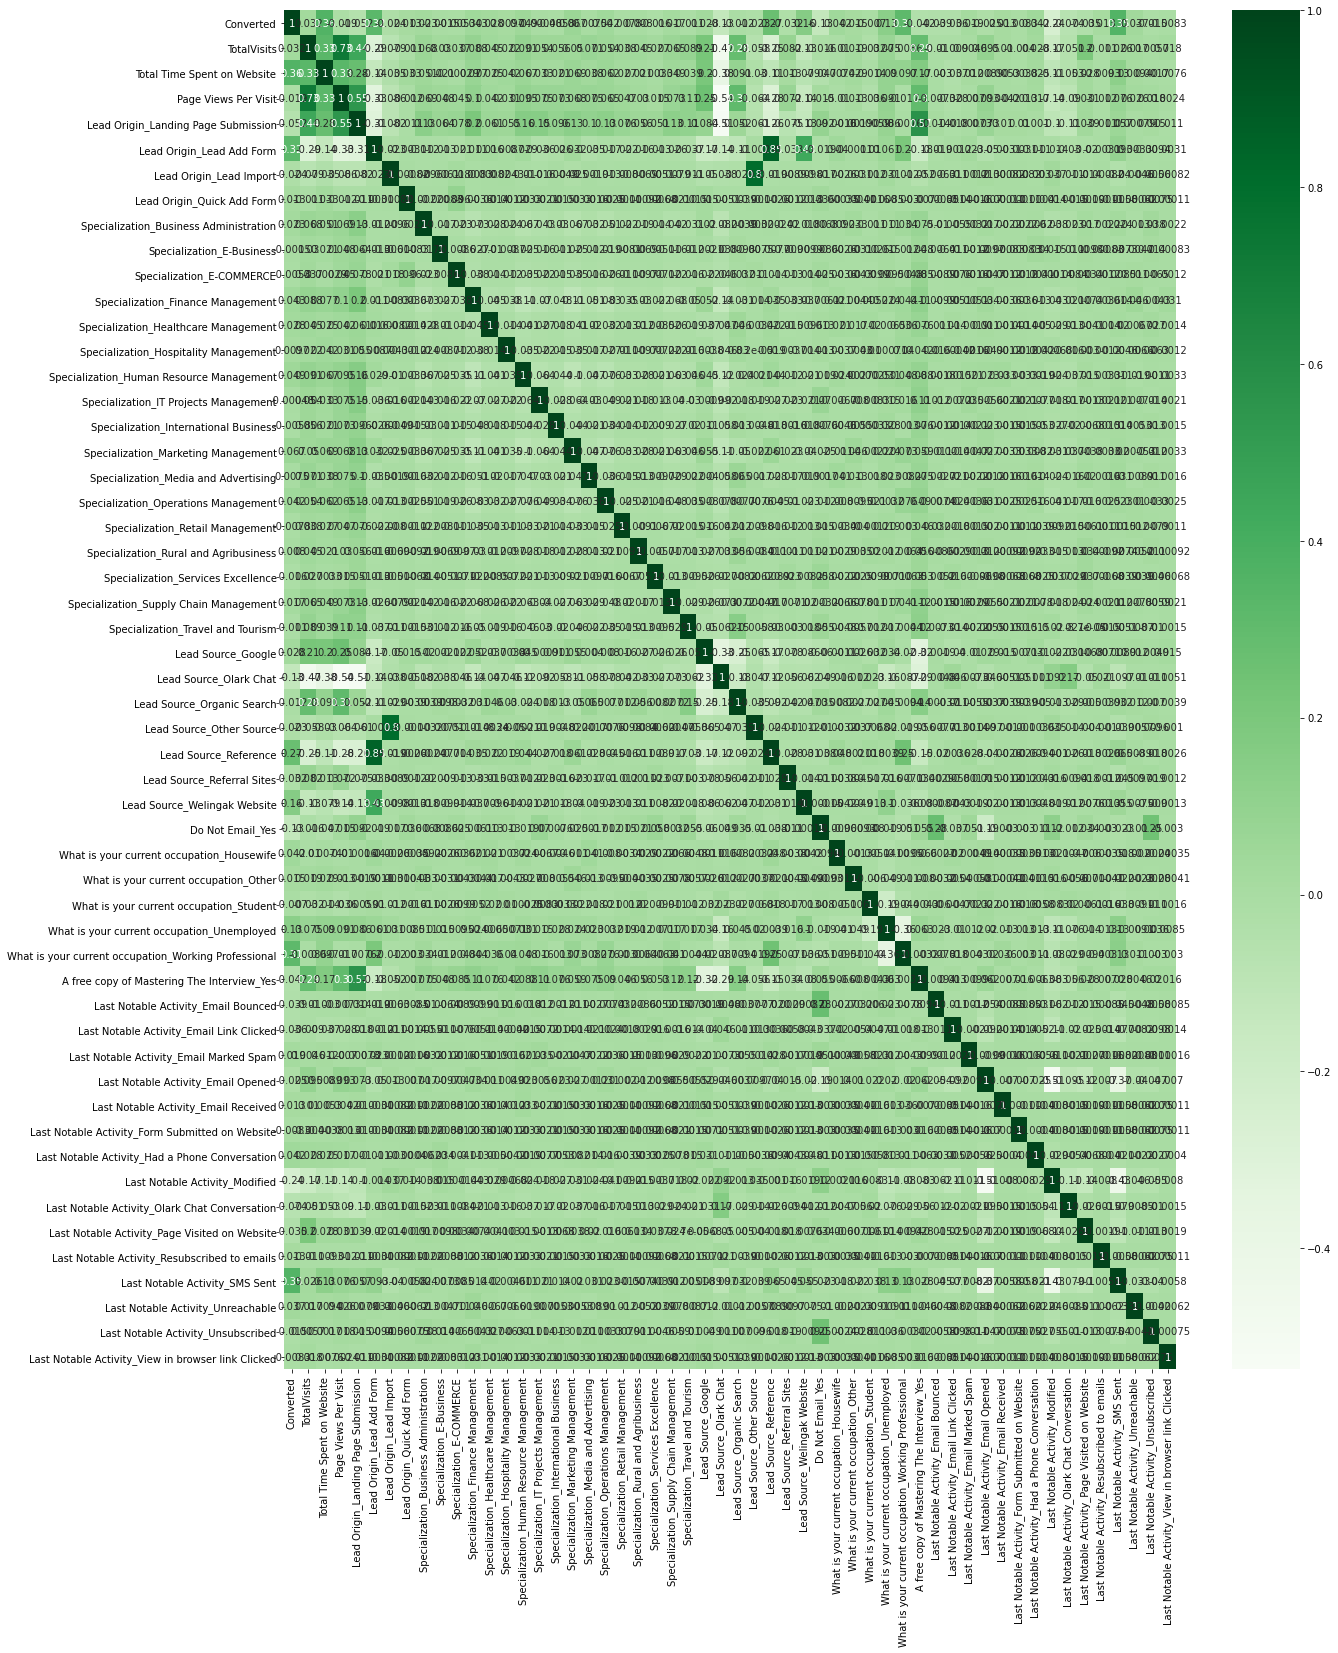

In [452]:
# plotting heatmap after dummy variables:
plt.figure(figsize=[20,25])
sns.heatmap(ls2.corr(),cmap='Greens', annot = True)
plt.show()

In [453]:
# Target variable Popped out in y:
y=ls2.pop('Converted')

In [454]:
# Rest of the dataset goes to X variable:
X=ls2

In [455]:
# test train split of dataset:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [456]:
# Scalling dataset:
scaler=StandardScaler()
X_train_scaled=X_train
# scaler applied on X-train (training set)
X_train_scaled[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']]=scaler.fit_transform(X_train_scaled[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])


In [457]:
# scaler applied on X_test (test set):
X_test_scaled=X_test

X_test_scaled[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']]=scaler.fit_transform(X_test_scaled[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])


In [458]:
# shape of training dataset after spliting and scaling:
X_train_scaled.shape

(6363, 54)

In [459]:
# shape of testing dataset after spliting and scaling:
X_test_scaled.shape

(2727, 54)

In [460]:
# head of test set:
X_test_scaled.head()

,Prospect ID,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Specialization_Business Administration,Specialization_E-Business,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3343,7a5b3287-b355-4f89-acf7-9a66d20f4072,-1.065313,-0.888737,-1.191812,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2600,09461af2-1913-4ade-8d3e-87005d0b5b4b,-0.051195,-0.628601,0.376604,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3115,57bcf7eb-a5e5-4c4c-8219-0631a71903fb,1.300961,-0.141773,2.467826,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1348,55cc76e6-a248-43cc-a095-ff0096bd233a,-1.065313,-0.888737,-1.191812,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4525,7c667111-2f04-4d46-a766-d6da3643095f,0.286844,2.271925,0.899409,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [461]:
# Prospect ID from train and test set being stored in variable for concatting it with test predictions:
test_prospectid=X_test_scaled['Prospect ID']
train_prospectid=X_train_scaled['Prospect ID']

In [462]:
# testing set prospect IDs:
test_prospectid.head()

3343    7a5b3287-b355-4f89-acf7-9a66d20f4072
2600    09461af2-1913-4ade-8d3e-87005d0b5b4b
3115    57bcf7eb-a5e5-4c4c-8219-0631a71903fb
1348    55cc76e6-a248-43cc-a095-ff0096bd233a
4525    7c667111-2f04-4d46-a766-d6da3643095f
Name: Prospect ID, dtype: object

In [463]:
# training set Prospect IDs:
train_prospectid.head()

2401    313c8f47-f32f-4375-b99a-45c5cf4e5bc8
6293    e779e5fa-27c8-4530-8d3b-75d45c4acac4
1393    a8672970-1a5d-48c9-a376-821853b6d180
301     064154e9-6e99-47fc-aa0c-c24462169fcf
7211    200f37a6-28dd-4c5c-9f2d-5e2f9feb7808
Name: Prospect ID, dtype: object

In [464]:
# for modelling purpose we dropped Prospect Id from both the test & training set as its not required in model:
X_test_scaled=X_test_scaled.drop(['Prospect ID'],axis=1)
X_train_scaled=X_train_scaled.drop(['Prospect ID'],axis=1)

In [465]:
# Importing Logistic Regression model from Sklearn:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# as there are lots of columns we are using RFE from Sklearn to get all important variables
from sklearn.feature_selection import RFE

# importing metric to determine model accuracy
from sklearn import metrics

In [466]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # finding top 15 varibles
rfe = rfe.fit(X_train_scaled, y_train)

In [467]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False,  True,  True,  True,  True, False,  True,
        True, False, False, False, False, False, False, False,  True,
       False,  True, False, False,  True,  True,  True, False])

In [468]:
list(zip(X_train_scaled.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 22),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 31),
 ('Lead Origin_Landing Page Submission', False, 18),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 7),
 ('Lead Origin_Quick Add Form', False, 14),
 ('Specialization_Business Administration', False, 19),
 ('Specialization_E-Business', False, 30),
 ('Specialization_E-COMMERCE', False, 32),
 ('Specialization_Finance Management', False, 21),
 ('Specialization_Healthcare Management', False, 15),
 ('Specialization_Hospitality Management', False, 5),
 ('Specialization_Human Resource Management', False, 25),
 ('Specialization_IT Projects Management', False, 26),
 ('Specialization_International Business', False, 28),
 ('Specialization_Marketing Management', False, 16),
 ('Specialization_Media and Advertising', False, 27),
 ('Specialization_Operations Management', False, 13),
 ('Specialization_Retail Management', False, 38),
 ('Specialization_Rural and Agri

In [469]:
newcolumns = X_train_scaled.columns[rfe.support_]

In [470]:
X_train_scaled.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Other Sour

In [471]:
# X_train_scale after rfe being transferred to X_train variable for model building:
X_train = X_train[newcolumns]

In [472]:
X_train

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
2401,-0.747324,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6293,-0.883435,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1393,-0.104881,1,0,0,1,0,0,0,1,0,0,0,0,0,0
301,0.196378,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7211,0.720859,1,0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5825,-0.883435,1,0,1,0,0,0,0,0,1,0,0,1,0,0
5264,-0.883435,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5468,-0.883435,0,1,0,0,0,0,0,0,0,0,0,0,0,0
878,-0.721917,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [473]:
# Building statsmodel:
import statsmodels.api as sm

# Model building using Statsmodel with p value and Vif method

#### Itteration 1:

In [474]:
# Creating instant:
log1 = sm.GLM(y_train,sm.add_constant(X_train), family = sm.families.Binomial())
# Fitting the model:
res = log1.fit()
# Printing the summary:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2639.5
Date:                Mon, 26 Oct 2020   Deviance:                       5279.0
Time:                        09:08:22   Pearson chi2:                 6.55e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2875      0.083    -27.514      0.000      -2.450      -2.125
Total Time Spent on Website                              1.1383      0.041     28.009      0.000       1.059       1.218
Lead Origin_Lead Add Form                                2.5575      0.457      5.594      0.000       1.661       3.454
Lead Source_Olark Chat                                   1.1889      0.101     11.822      0.000       0.992       1.386
Lead Source_Reference                                    1.1522      0.495      2.326      0.020       0.181       2.123
Lead Source_Welingak Website                             3.1630      0.853      3.709      0.000       1.492       4.834
Do Not Email_Yes                                        -1.4893      0.175     -8.531      0.000      -1.831      -1.147
What is your current occupation_Housewife               23.9828   1.53e+04      0.002      0.999      -3e+04    3.01e+04
What is your current occupation_Other                    1.5547      0.693      2.244      0.025       0.197       2.913
What is your current occupation_Unemployed               1.0511      0.083     12.605      0.000       0.888       1.215
What is your current occupation_Working Professional     3.3601      0.188     17.833      0.000       2.991       3.729
Last Notable Activity_Had a Phone Conversation           3.0931      1.187      2.606      0.009       0.767       5.419
Last Notable Activity_Olark Chat Conversation           -1.1423      0.333     -3.426      0.001      -1.796      -0.489
Last Notable Activity_SMS Sent                           1.6495      0.079     20.799      0.000       1.494       1.805
Last Notable Activity_Unreachable                        2.1247      0.554      3.832      0.000       1.038       3.212
Last Notable Activity_Unsubscribed                       1.5314      0.551      2.780      0.005       0.452       2.611
========================================================================================================================
"""

In [475]:
# importing vif module:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [476]:
# Checking vif of dataframe:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,15.83
3,Lead Source_Reference,12.64
4,Lead Source_Welingak Website,4.07
8,What is your current occupation_Unemployed,1.49
12,Last Notable Activity_SMS Sent,1.37
2,Lead Source_Olark Chat,1.34
0,Total Time Spent on Website,1.26
9,What is your current occupation_Working Profes...,1.21
5,Do Not Email_Yes,1.11
14,Last Notable Activity_Unsubscribed,1.06


**`Vif of the above model is less than 2 so it is fine but on the other hand column 'What is your current occupation_Housewife' is having very high p value so we will drop it.`**

In [477]:
# Dropped 'What is your current occupation_Housewife' column:
X_train=X_train.drop(['What is your current occupation_Housewife'],axis=1)
X_train.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,What is your current occupation_Other,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
2401,-0.747324,0,0,0,0,0,0,0,0,0,0,0,0,0
6293,-0.883435,0,1,0,0,0,0,1,0,0,0,0,0,0
1393,-0.104881,1,0,0,1,0,0,1,0,0,0,0,0,0
301,0.196378,0,0,0,0,0,0,1,0,0,0,0,0,0
7211,0.720859,1,0,1,0,0,0,0,1,0,0,0,0,0


#### Itteration 2:

In [478]:
log2 = sm.GLM(y_train,sm.add_constant(X_train), family = sm.families.Binomial())
res = log2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2648.8
Date:                Mon, 26 Oct 2020   Deviance:                       5297.6
Time:                        09:08:22   Pearson chi2:                 6.57e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2612      0.082    -27.422      0.000      -2.423      -2.100
Total Time Spent on Website                              1.1377      0.041     28.050      0.000       1.058       1.217
Lead Origin_Lead Add Form                                2.5568      0.457      5.593      0.000       1.661       3.453
Lead Source_Olark Chat                                   1.1783      0.100     11.742      0.000       0.982       1.375
Lead Source_Reference                                    1.1686      0.495      2.360      0.018       0.198       2.139
Lead Source_Welingak Website                             3.1617      0.853      3.708      0.000       1.490       4.833
Do Not Email_Yes                                        -1.4938      0.174     -8.563      0.000      -1.836      -1.152
What is your current occupation_Other                    1.5300      0.693      2.208      0.027       0.172       2.888
What is your current occupation_Unemployed               1.0283      0.083     12.407      0.000       0.866       1.191
What is your current occupation_Working Professional     3.3360      0.188     17.730      0.000       2.967       3.705
Last Notable Activity_Had a Phone Conversation           3.0818      1.185      2.600      0.009       0.759       5.405
Last Notable Activity_Olark Chat Conversation           -1.1497      0.333     -3.450      0.001      -1.803      -0.497
Last Notable Activity_SMS Sent                           1.6435      0.079     20.742      0.000       1.488       1.799
Last Notable Activity_Unreachable                        2.1116      0.554      3.813      0.000       1.026       3.197
Last Notable Activity_Unsubscribed                       1.5291      0.550      2.779      0.005       0.451       2.608
========================================================================================================================
"""

In [479]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,15.82
3,Lead Source_Reference,12.64
4,Lead Source_Welingak Website,4.07
7,What is your current occupation_Unemployed,1.49
11,Last Notable Activity_SMS Sent,1.37
2,Lead Source_Olark Chat,1.34
0,Total Time Spent on Website,1.26
8,What is your current occupation_Working Profes...,1.21
5,Do Not Email_Yes,1.11
13,Last Notable Activity_Unsubscribed,1.06


**`Vif of the above model is less than 2 so it is fine but on the other hand column 'Last Notable Activity_Had a Phone Conversation	' is having quite high p value so we will drop it.`**

In [480]:
# dropped 'Last Notable Activity_Had a Phone Conversation' column
X_train=X_train.drop(['Last Notable Activity_Had a Phone Conversation'],axis=1)
X_train.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,What is your current occupation_Other,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
2401,-0.747324,0,0,0,0,0,0,0,0,0,0,0,0
6293,-0.883435,0,1,0,0,0,0,1,0,0,0,0,0
1393,-0.104881,1,0,0,1,0,0,1,0,0,0,0,0
301,0.196378,0,0,0,0,0,0,1,0,0,0,0,0
7211,0.720859,1,0,1,0,0,0,0,1,0,0,0,0


#### Itteration 3:

In [481]:
log3 = sm.GLM(y_train,sm.add_constant(X_train), family = sm.families.Binomial())
res = log3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2653.5
Date:                Mon, 26 Oct 2020   Deviance:                       5307.0
Time:                        09:08:22   Pearson chi2:                 6.58e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2549      0.082    -27.385      0.000      -2.416      -2.094
Total Time Spent on Website                              1.1367      0.040     28.068      0.000       1.057       1.216
Lead Origin_Lead Add Form                                2.5521      0.457      5.584      0.000       1.656       3.448
Lead Source_Olark Chat                                   1.1722      0.100     11.699      0.000       0.976       1.369
Lead Source_Reference                                    1.1661      0.495      2.355      0.019       0.196       2.136
Lead Source_Welingak Website                             3.1597      0.853      3.706      0.000       1.489       4.831
Do Not Email_Yes                                        -1.4971      0.174     -8.587      0.000      -1.839      -1.155
What is your current occupation_Other                    1.5259      0.693      2.202      0.028       0.168       2.884
What is your current occupation_Unemployed               1.0298      0.083     12.434      0.000       0.867       1.192
What is your current occupation_Working Professional     3.3381      0.188     17.760      0.000       2.970       3.706
Last Notable Activity_Olark Chat Conversation           -1.1529      0.333     -3.460      0.001      -1.806      -0.500
Last Notable Activity_SMS Sent                           1.6374      0.079     20.681      0.000       1.482       1.793
Last Notable Activity_Unreachable                        2.1057      0.554      3.802      0.000       1.020       3.191
Last Notable Activity_Unsubscribed                       1.5262      0.550      2.774      0.006       0.448       2.605
========================================================================================================================
"""

In [482]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,15.82
3,Lead Source_Reference,12.64
4,Lead Source_Welingak Website,4.07
7,What is your current occupation_Unemployed,1.49
10,Last Notable Activity_SMS Sent,1.37
2,Lead Source_Olark Chat,1.34
0,Total Time Spent on Website,1.26
8,What is your current occupation_Working Profes...,1.21
5,Do Not Email_Yes,1.11
12,Last Notable Activity_Unsubscribed,1.06


**`Vif of the above model is less than 2 so it is fine but on the other hand column 'Lead Source_Welingak Website' is having a  p value 1.3% but we will drop it`**

In [483]:
# dropped 'What is your current occupation_Other' column:
X_train=X_train.drop(['What is your current occupation_Other'],axis=1)
X_train.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
2401,-0.747324,0,0,0,0,0,0,0,0,0,0,0
6293,-0.883435,0,1,0,0,0,1,0,0,0,0,0
1393,-0.104881,1,0,0,1,0,1,0,0,0,0,0
301,0.196378,0,0,0,0,0,1,0,0,0,0,0
7211,0.720859,1,0,1,0,0,0,1,0,0,0,0


#### Itteration 4:

In [484]:
X_train_sm=sm.add_constant(X_train)
log4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2656.0
Date:                Mon, 26 Oct 2020   Deviance:                       5311.9
Time:                        09:08:23   Pearson chi2:                 6.58e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2384      0.082    -27.379      0.000      -2.399      -2.078
Total Time Spent on Website                              1.1390      0.040     28.129      0.000       1.060       1.218
Lead Origin_Lead Add Form                                2.5522      0.457      5.586      0.000       1.657       3.448
Lead Source_Olark Chat                                   1.1697      0.100     11.684      0.000       0.974       1.366
Lead Source_Reference                                    1.1745      0.495      2.373      0.018       0.204       2.145
Lead Source_Welingak Website                             3.1597      0.853      3.706      0.000       1.489       4.831
Do Not Email_Yes                                        -1.4903      0.174     -8.561      0.000      -1.831      -1.149
What is your current occupation_Unemployed               1.0141      0.082     12.315      0.000       0.853       1.175
What is your current occupation_Working Professional     3.3220      0.188     17.696      0.000       2.954       3.690
Last Notable Activity_Olark Chat Conversation           -1.1606      0.333     -3.483      0.000      -1.814      -0.508
Last Notable Activity_SMS Sent                           1.6334      0.079     20.641      0.000       1.478       1.789
Last Notable Activity_Unreachable                        2.0975      0.553      3.790      0.000       1.013       3.182
Last Notable Activity_Unsubscribed                       1.5151      0.550      2.755      0.006       0.437       2.593
========================================================================================================================
"""

In [485]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,15.82
3,Lead Source_Reference,12.64
4,Lead Source_Welingak Website,4.07
6,What is your current occupation_Unemployed,1.49
9,Last Notable Activity_SMS Sent,1.37
2,Lead Source_Olark Chat,1.34
0,Total Time Spent on Website,1.26
7,What is your current occupation_Working Profes...,1.21
5,Do Not Email_Yes,1.11
11,Last Notable Activity_Unsubscribed,1.06


**`All P-Values and VIF are in perfect numbers so we will go forward with this model `**

## Prediction on Train set

In [486]:
# predicting the possiblities using our model:
y_train_predicted = res.predict(X_train_sm)
y_train_predicted[:10]

2401    0.043538
6293    0.257152
1393    0.987483
301     0.268815
7211    0.996429
8739    0.173529
1536    0.817000
8343    0.946551
6156    0.970152
1664    0.171170
dtype: float64

In [487]:
# dataframe created y_final:
y_final = pd.DataFrame({'Converted':y_train, 'Probablity':y_train_predicted})
y_final

,Converted,Probablity
2401,0,0.043538
6293,0,0.257152
1393,1,0.987483
301,1,0.268815
7211,1,0.996429
...,...,...
5825,1,0.995668
5264,0,0.111558
5468,0,0.111558
878,0,0.010447


In [488]:
# new varibale Prediction created with a cutoff:
y_final['Prediction'] = y_final.Probablity.map(lambda x: 1 if x > 0.6 else 0)
y_final.head()

,Converted,Probablity,Prediction
2401,0,0.043538,0
6293,0,0.257152,0
1393,1,0.987483,1
301,1,0.268815,0
7211,1,0.996429,1


In [489]:
# Confusing matrix Created:
matrix = metrics.confusion_matrix(y_final.Converted,y_final.Prediction)
matrix

array([[3566,  336],
       [ 929, 1532]], dtype=int64)

#### We created Confusion Matrix to evaluate model
### Predicted Positive  :
#### TP=3566          
#### FP=336
### Predicted Negatives : 
#### FN=929
#### TN=1532

In [490]:
# model accuracy on train set with 0.6 cutoff:
metrics.accuracy_score(y_final.Converted, y_final.Prediction)

0.8011944051548012

## Lets Find out the Best cutoff using Roc Curve ,sensitivity,specificity etc.

In [491]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [492]:
fpr, tpr, thresholds = metrics.roc_curve( y_final.Converted, y_final.Prediction, drop_intermediate = False )

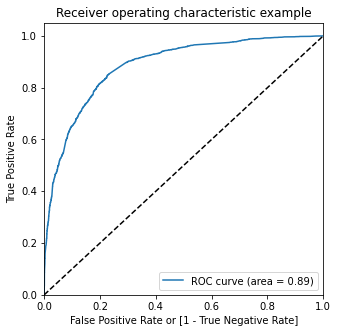

In [493]:
# drawing ROC curve:
draw_roc(y_final.Converted, y_final.Probablity)

In [494]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_final[i]= y_final.Probablity.map(lambda x: 1 if x > i else 0)
y_final.head()

,Converted,Probablity,Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
2401,0,0.043538,0,1,0,0,0,0,0,0,0,0,0
6293,0,0.257152,0,1,1,1,0,0,0,0,0,0,0
1393,1,0.987483,1,1,1,1,1,1,1,1,1,1,1
301,1,0.268815,0,1,1,1,0,0,0,0,0,0,0
7211,1,0.996429,1,1,1,1,1,1,1,1,1,1,1


In [495]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_final.Converted, y_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386767,1.000000,0.000000
0.1,0.1,0.558856,0.982934,0.291389
0.2,0.2,0.761119,0.913043,0.665300
0.3,0.3,0.801823,0.835026,0.780882
0.4,0.4,0.805752,0.768387,0.829318
0.5,0.5,0.805752,0.688338,0.879805
0.6,0.6,0.801194,0.622511,0.913890
0.7,0.7,0.778564,0.512393,0.946438
0.8,0.8,0.761119,0.431126,0.969247
0.9,0.9,0.711457,0.275498,0.986417


### By looking  at above dataframe it is seen that cutoff between 0.3 and 0.4 would be best for our model

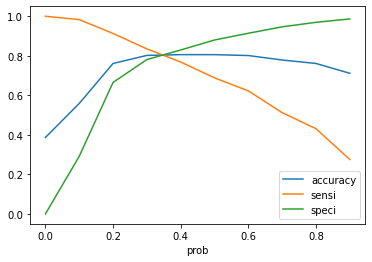

In [496]:
# Plotting accuracy ,sensitivity,specificity for better understanding:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- From above graph we set X limit to 35%.

In [500]:
# Updating column prediction according to cutoff opted:
y_final['Prediction'] = y_final.Probablity.map(lambda x: 1 if x > 0.35 else 0)
y_final.head()

,Converted,Probablity,Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
2401,0,0.043538,0,1,0,0,0,0,0,0,0,0,0
6293,0,0.257152,0,1,1,1,0,0,0,0,0,0,0
1393,1,0.987483,1,1,1,1,1,1,1,1,1,1,1
301,1,0.268815,0,1,1,1,0,0,0,0,0,0,0
7211,1,0.996429,1,1,1,1,1,1,1,1,1,1,1


In [501]:
# accuracy on train set:
metrics.accuracy_score(y_final.Converted, y_final.Prediction)

0.8065377966368066

In [502]:
# confusion matrix made to derive true posive ,true negative,false positive and negatives:
matrix = metrics.confusion_matrix(y_final.Converted,y_final.Prediction)
matrix

array([[3124,  778],
       [ 453, 2008]], dtype=int64)

In [503]:
TP = matrix[1,1] # true positive 
TN = matrix[0,0] # true negatives
FP = matrix[0,1] # false positives
FN = matrix[1,0] # false negatives

In [504]:
# Sensitivity of our model:
TP / float(TP+FN)

0.8159284843559529

In [505]:
# specificity of our model:
TN / float(TN+FP)

0.8006150691952845

In [506]:
# Calculate false postive rate - predicting converted when it doesnt converted:
print(FP/ float(TN+FP))

0.19938493080471553


In [507]:
# Positive predictive value:
print (TP / float(TP+FP))

0.7207465900933238


In [508]:
# Negative predictive value:
print (TN / float(TN+ FN))

0.8733575622029633


In [509]:
# precison:
TP/float(TP+FP)


0.7207465900933238

In [510]:
# recall:
TP/float(TP+FN)

0.8159284843559529

In [511]:
# precison recall tradeoff:
from sklearn.metrics import precision_recall_curve

In [512]:
# calculating precision and recall:
p, r, thresholds = precision_recall_curve(y_final.Converted,y_final.Probablity)

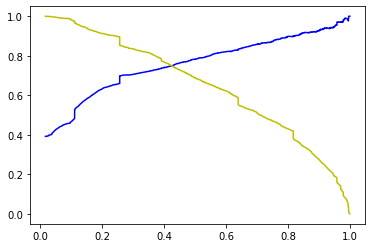

In [513]:
# plotting precision recall curve:
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "y-")
plt.show()

## Prediction on test set

In [514]:
# adding constant:
X_test_sm = sm.add_constant(X_test_scaled)

In [515]:
col=X_train_sm.columns

In [516]:
# columns adjusted:
X_test_sm=X_test_sm[col]

In [517]:
X_test_sm

,const,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3343,1.0,-0.888737,0,1,0,0,0,1,0,0,0,0,0
2600,1.0,-0.628601,0,0,0,0,0,0,1,0,0,0,0
3115,1.0,-0.141773,0,0,0,0,0,0,0,0,0,0,0
1348,1.0,-0.888737,0,1,0,0,0,0,0,0,0,0,0
4525,1.0,2.271925,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3325,1.0,-0.888737,1,0,1,0,0,1,0,0,1,0,0
432,1.0,-0.028428,0,0,0,0,0,1,0,0,0,0,0
8120,1.0,1.400467,1,0,0,1,0,1,0,0,0,0,0
4056,1.0,-0.888737,0,1,0,0,0,1,0,0,1,0,0


In [518]:
# prediction on test set:
y_test_Probablity = res.predict(X_test_sm)

In [519]:
# new dataframe with prediction made:
y_test_final=pd.DataFrame({'Converted':y_test.values,'TestProbablity':y_test_Probablity})
y_test_final

,Converted,TestProbablity
3343,1,0.256000
2600,1,0.590882
3115,0,0.083181
1348,0,0.110961
4525,1,0.952430
...,...,...
3325,1,0.957853
432,0,0.221543
8120,1,0.997723
4056,1,0.637969


In [520]:
# after cutoff Prediction in 0 and 1 made:
y_test_final['Prediction']= y_test_final.TestProbablity.map(lambda x: 1 if x > 0.35 else 0)
y_test_final.head()

,Converted,TestProbablity,Prediction
3343,1,0.256000,0
2600,1,0.590882,1
3115,0,0.083181,0
1348,0,0.110961,0
4525,1,0.952430,1


#### Model Evaulation:

In [521]:
# accuracy on test set:
metrics.accuracy_score(y_test_final['Converted'], y_test_final.Prediction)

0.8151815181518152

In [522]:
# confusion matrix for test:
matrix2 = metrics.confusion_matrix(y_test_final['Converted'], y_test_final.Prediction)
matrix2

array([[1373,  320],
       [ 184,  850]], dtype=int64)

In [523]:
# for test matrix ,findinf tp,fp etc
TP1 = matrix2[1,1] # true positive 
TN1 = matrix2[0,0] # true negatives
FP1 = matrix2[0,1] # false positives
FN1 = matrix2[1,0] # false negatives

In [524]:
# sensitivity of our logistic regression model on test set:
TP1 / float(TP1+FN1)

0.8220502901353965

In [525]:
# specificity of logistic regression model on test set:
TN1 / float(TN1+FP1)

0.8109864146485528

In [526]:
# precision of our logistic regression model on test:
TP1 / (TP1 + FP1)

0.7264957264957265

In [527]:
# Recall of our logistic regression model on test:
TP1 / (TP1 + FN1)

0.8220502901353965

In [528]:
y_test_final=pd.concat([y_test_final,test_prospectid],axis=1)

In [529]:
# final dataset with Prediction and and thier respective Prospect Id:
y_test_final

,Converted,TestProbablity,Prediction,Prospect ID
3343,1,0.256000,0,7a5b3287-b355-4f89-acf7-9a66d20f4072
2600,1,0.590882,1,09461af2-1913-4ade-8d3e-87005d0b5b4b
3115,0,0.083181,0,57bcf7eb-a5e5-4c4c-8219-0631a71903fb
1348,0,0.110961,0,55cc76e6-a248-43cc-a095-ff0096bd233a
4525,1,0.952430,1,7c667111-2f04-4d46-a766-d6da3643095f
...,...,...,...,...
3325,1,0.957853,1,40ae37e6-dd16-438f-8349-41b7fa53d3cf
432,0,0.221543,0,fb1ea0fb-5340-4565-9d50-df30d828447c
8120,1,0.997723,1,bf4a03bc-b747-45a6-a6b5-659afa3bf3ac
4056,1,0.637969,1,15c2e7f4-a9ee-4fbf-81d6-9dfbc62c1e59


### Calculating F1 score:

In [530]:
# F1 score on training set:
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F1_train = 2 * (precision * recall) / (precision + recall)
F1_train

0.765389746521822

In [532]:
# F1 score on test set:
precision_t = TP1 / (TP1 + FP1)
recall_t = TP1 / (TP1 + FN1)
F1_test = 2 * (precision_t * recall_t) / (precision_t + recall_t)
F1_test

0.7713248638838475

# Summary:

- Here we did a case study on Lead Score, for a X Education company which sells online based course for, working professionals. 
The company was having a very low leads conversion rate. So our objective was to determine the significant variables, which will be having positive impact on lead score, the steps followed were:
    1. Reading DataSet
    2. Data Cleaning ie. Treating missing values and abnormalities.
    3. Outlier Analysis
    4. EDA
    5. Model Building
    6. RFE
    7. variable elimination using VIF and p-value
    8. Finding optimal cutoff
    9. Analysis on test set
    10. Evalution of Model.

# Inferences:

- Inferences from EDA:
    1. Most of the leads were orriginated from APIs and Landing page submission, whereas the least were from Quick Add form.
    2. A large number of leads came from India itself, then from the other country.
    3. Leads were generated majorly from Google and Direct Traffic and least were from Referral Sites.
    4. The leads whose specilisation were not provided, shown higher conversion rate, compared with other specilisation. Whereas the Leads with E-Business and Service-Excellence as specilisation showed lower conversion.
    5. People who are unemployed have the highest conversion rate compared to other occupation.
    6. Leads sourced from google and direct traffic showed higher conversion rate, However these source also shown higher non conversion rate.
    7. The source with reference showed higher conversion rate.
    8. Poeple with motive of seeking higher career prospects showed higher conversion rate, compared to any other.
    9. The leads which were orriginated from landing page submission showed higher conversion rate, however the same category also had the highest non conversion rate too.
        
        

- The Score on train and test set were:
      on training set:
        1. accuracy: 80.65%
        2. sensitivity: 81.59%
        3. specificity: 80.06%
        4. precision: 72.07%
        5. recall: 81.59%
        6. F1 score: 76.53%
      on test set:
        1. accuracy: 81.51%
        2. sensitivity: 82.20%
        3. specificity: 81.09%
        4. precision: 72.64%
        5. recall: 82.20%
        6. F1 score: 77.13%

- It can see be seen that, the model performed pretty good on train as well as test set.

# Conclusion:
    After automated and manual variable elimination, we narrowed down to following variables:
        
        Lead Origin_Lead Add Form                                           
        Lead Source_Reference
        Lead Source_Welingak Website
        What is your current occupation_Unemployed
        Last Notable Activity_SMS Sent
        Lead Source_Olark Chat
        Total Time Spent on Website
        What is your current occupation_Working Professional
        Do Not Email_Yes
        Last Notable Activity_Unsubscribed
        Last Notable Activity_Olark Chat Conversation
        Last Notable Activity_Unreachable
        
    Out of which Do Not Email_Yes and Last Notable Activity_Olark Chat Conversation is having negative coefficent, 
    Company should consider Variables other than these two for better Lead conversion.